In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("/content/Social_Network_Ads.csv")

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


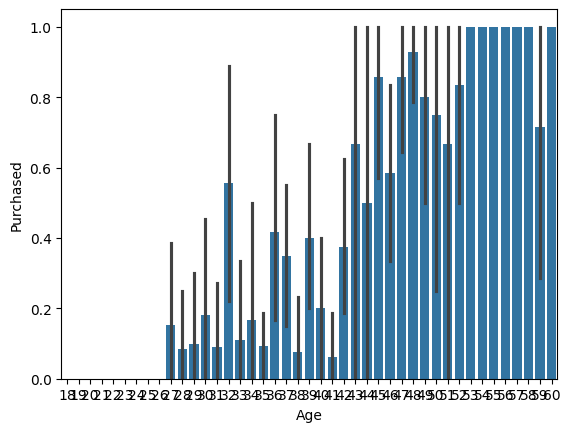

In [10]:
sns.barplot(df,x='Age',y='Purchased')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(columns ='Purchased')
y = df['Purchased']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_transform = ss.fit_transform(X_train)
X_test_transform = ss.transform(X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_transform,y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
y_pred_test  = tree.predict(X_test_transform)

In [18]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred_test)

0.9

In [19]:
f1_score(y_test,y_pred_test)

0.8260869565217391

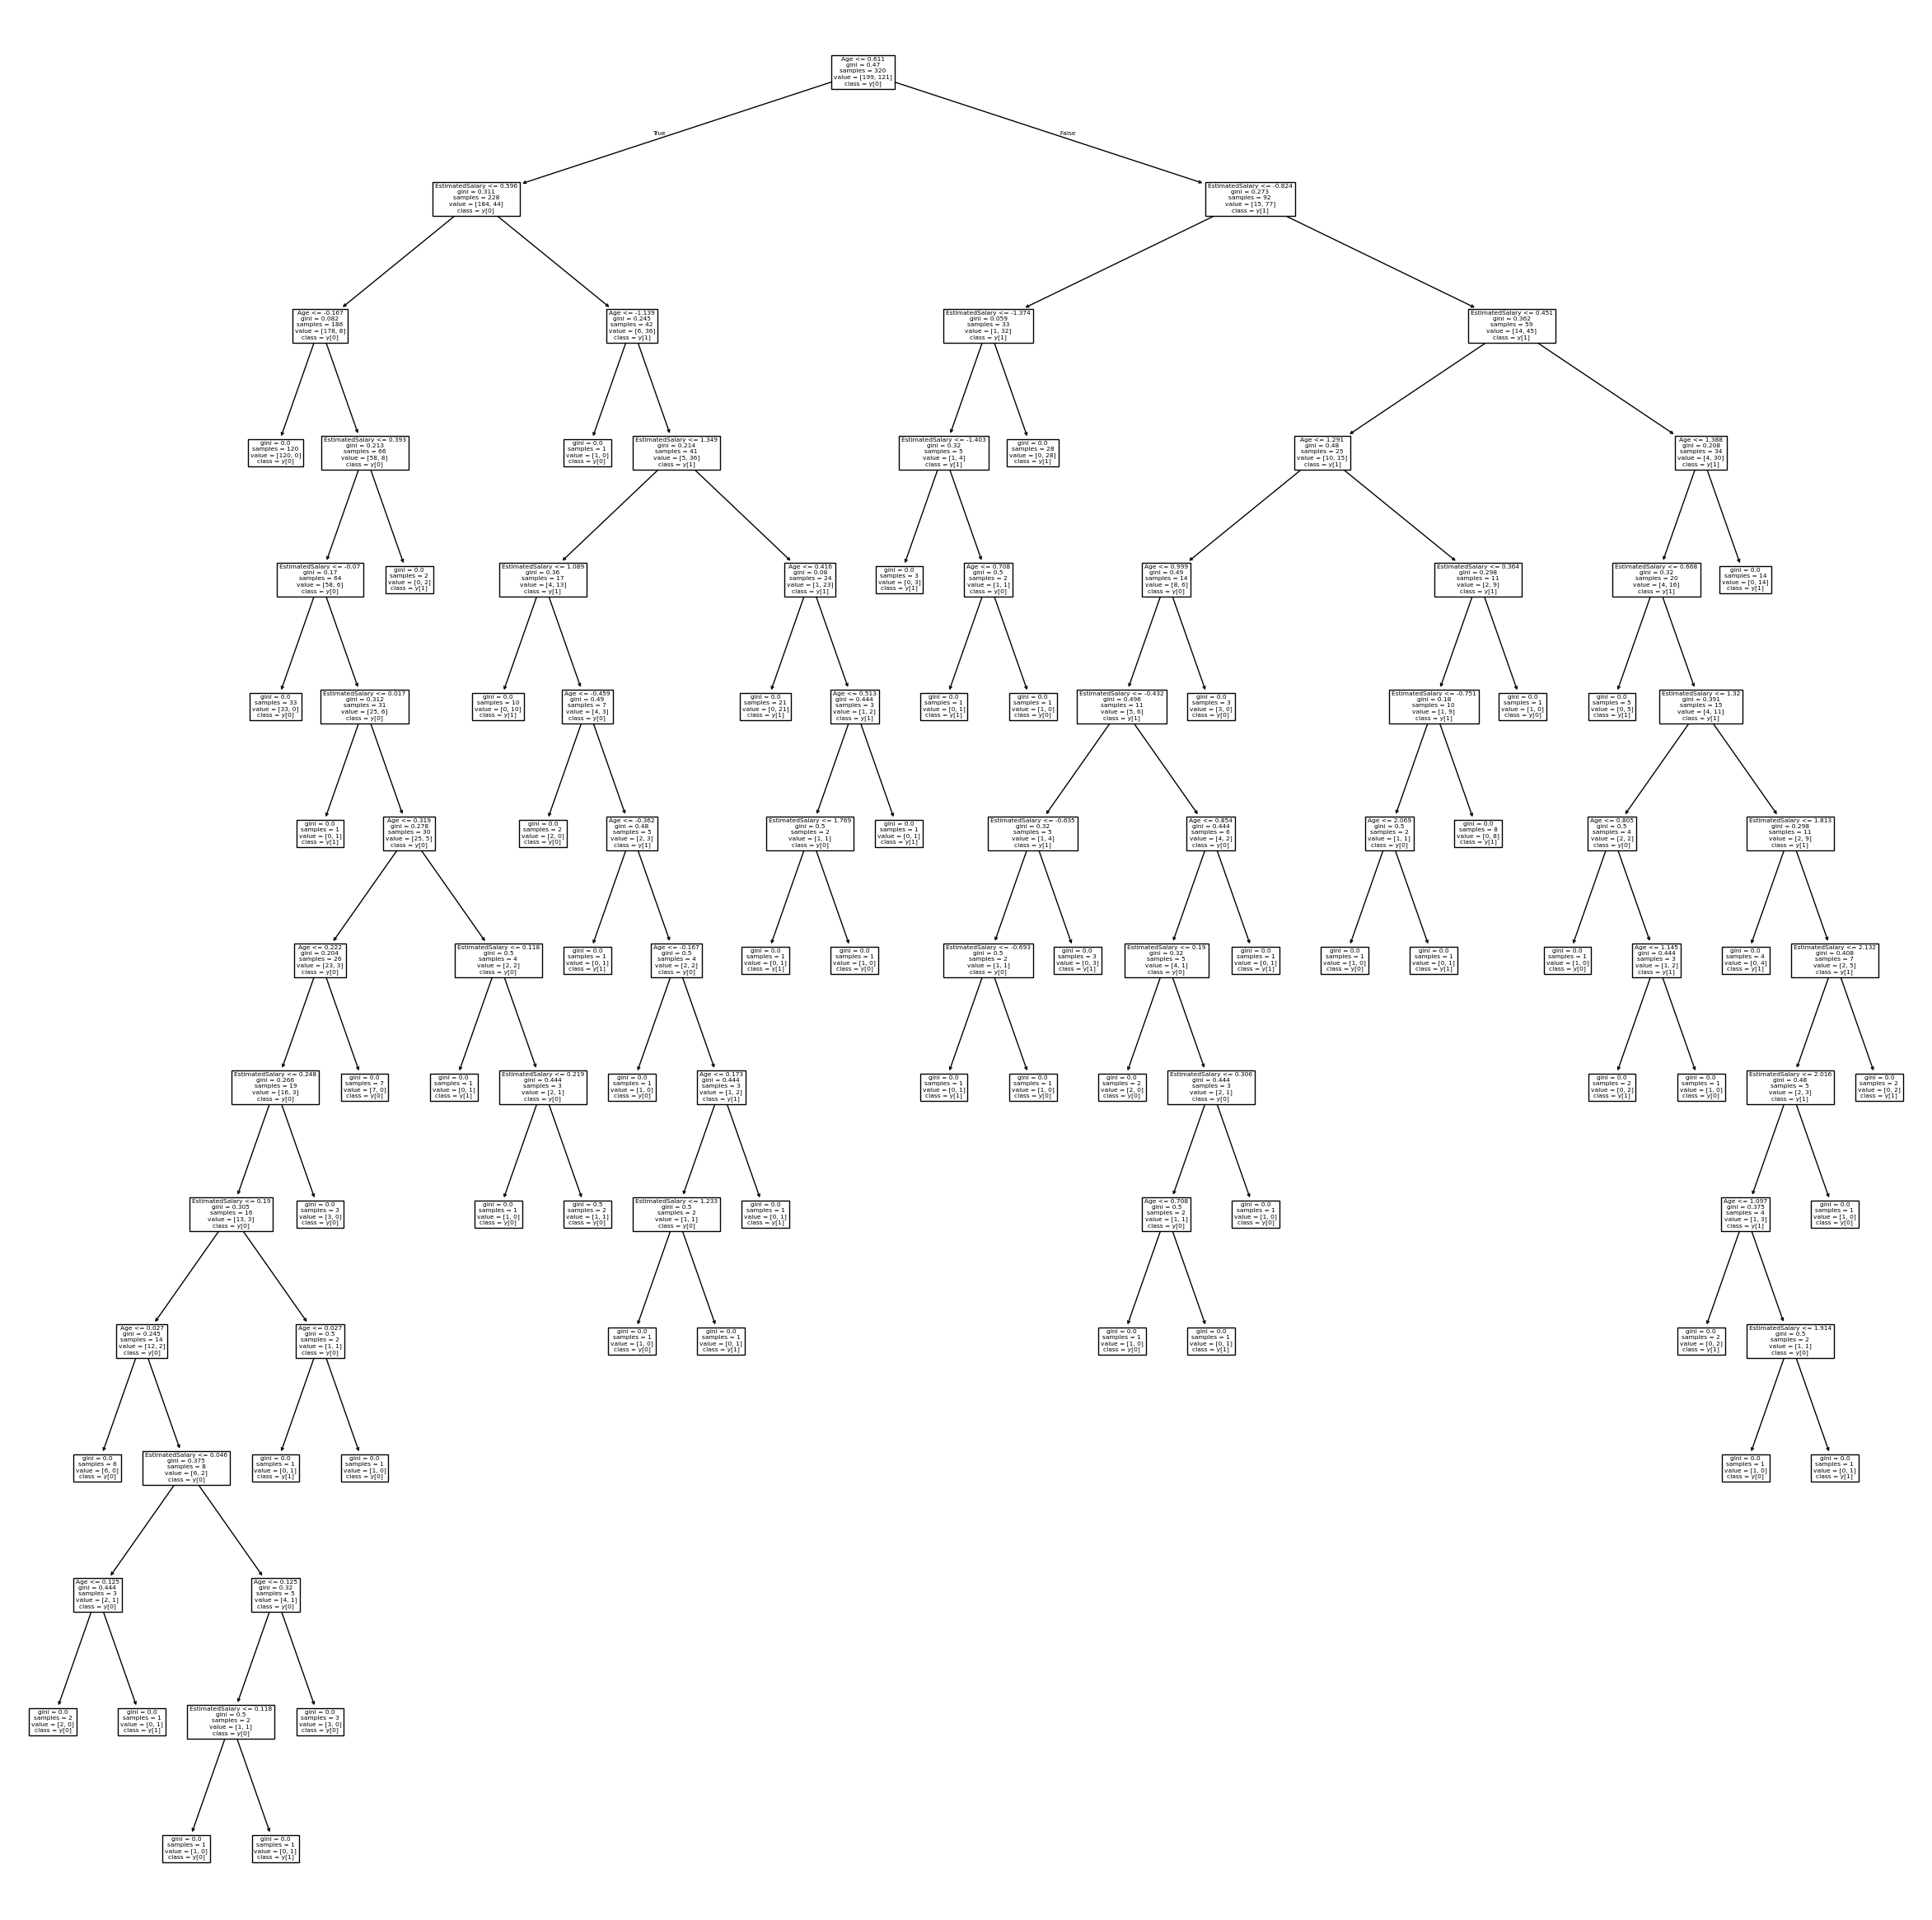

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(tree,feature_names=X.columns, class_names = True)
plt.show()

f1-score on training data is : 0.889763779527559
f1-score on test data is : 0.9130434782608695


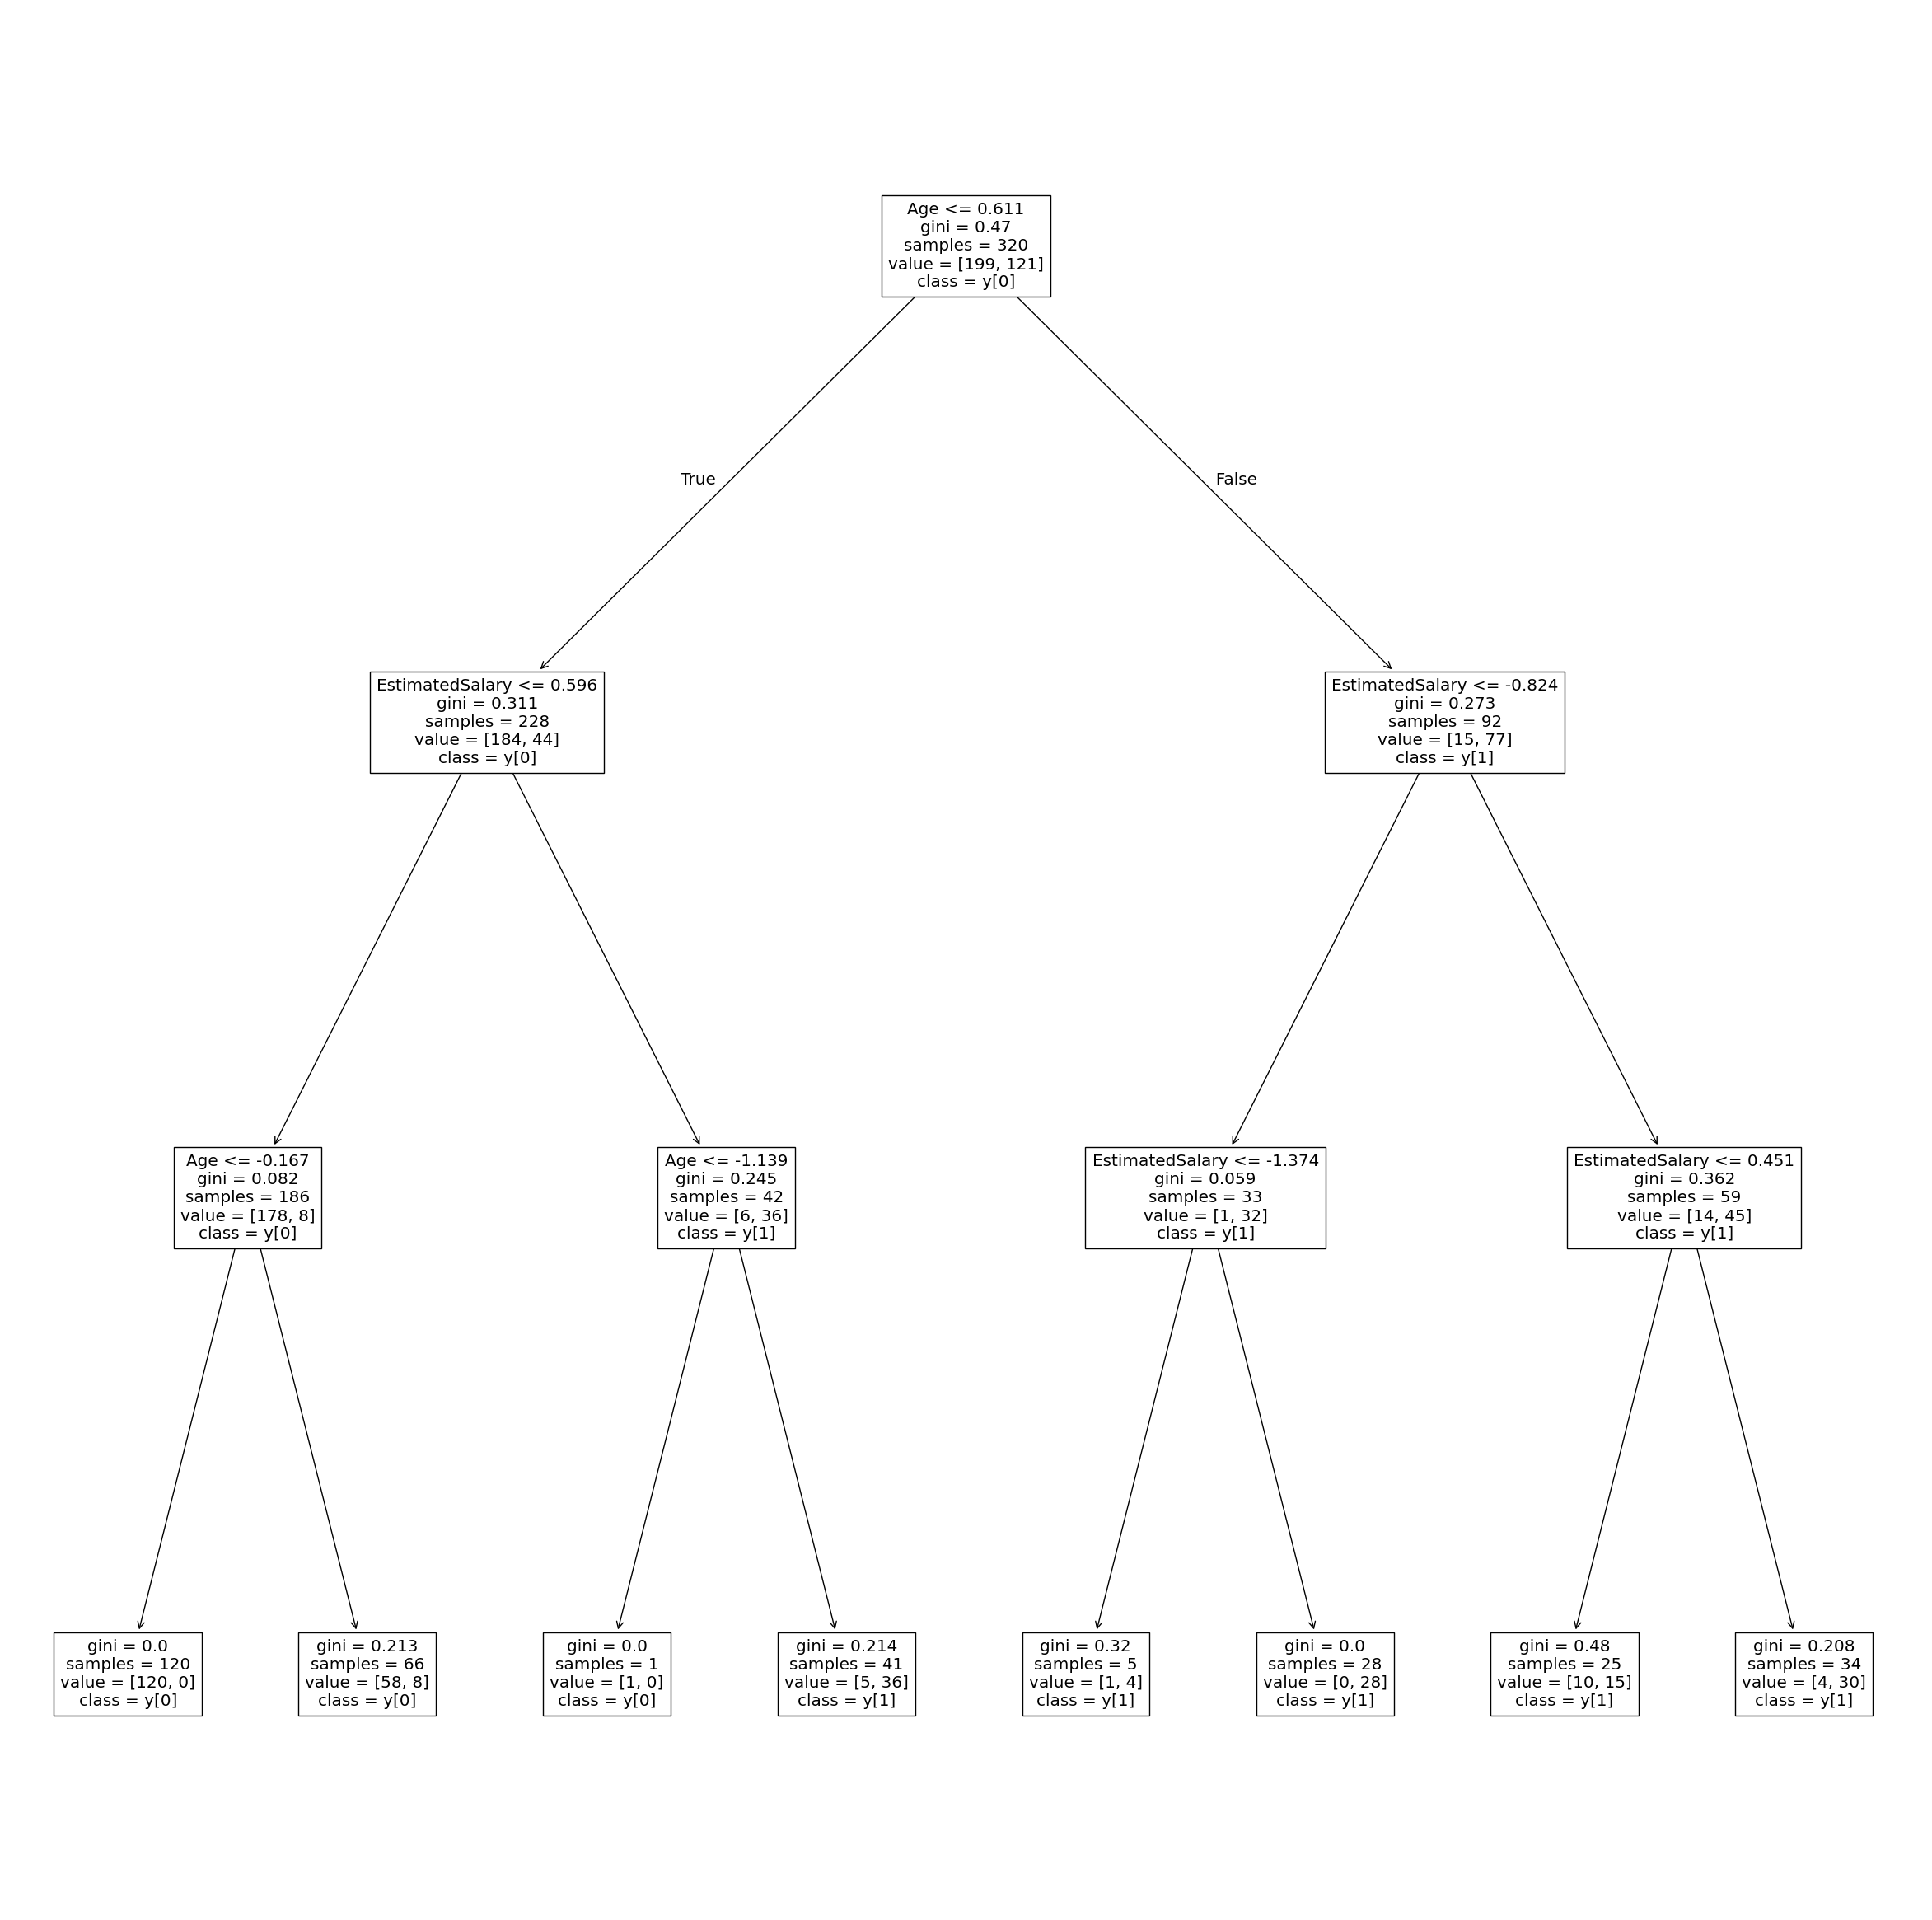

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree2 = DecisionTreeClassifier(random_state=0, max_depth=3)
tree2.fit(X_train_transform,y_train)
y_pred_test = tree2.predict(X_test_transform)
y_pred_train = tree2.predict(X_train_transform)

print(f"f1-score on training data is : {f1_score(y_train,y_pred_train)}")
print(f"f1-score on test data is : {f1_score(y_test,y_pred_test)}")
plt.figure(figsize=(30,30))
plot_tree(tree2,feature_names=X.columns,class_names=True)
plt.show()

f1-score on training data is : 0.8870292887029289
f1-score on test data is : 0.9090909090909091


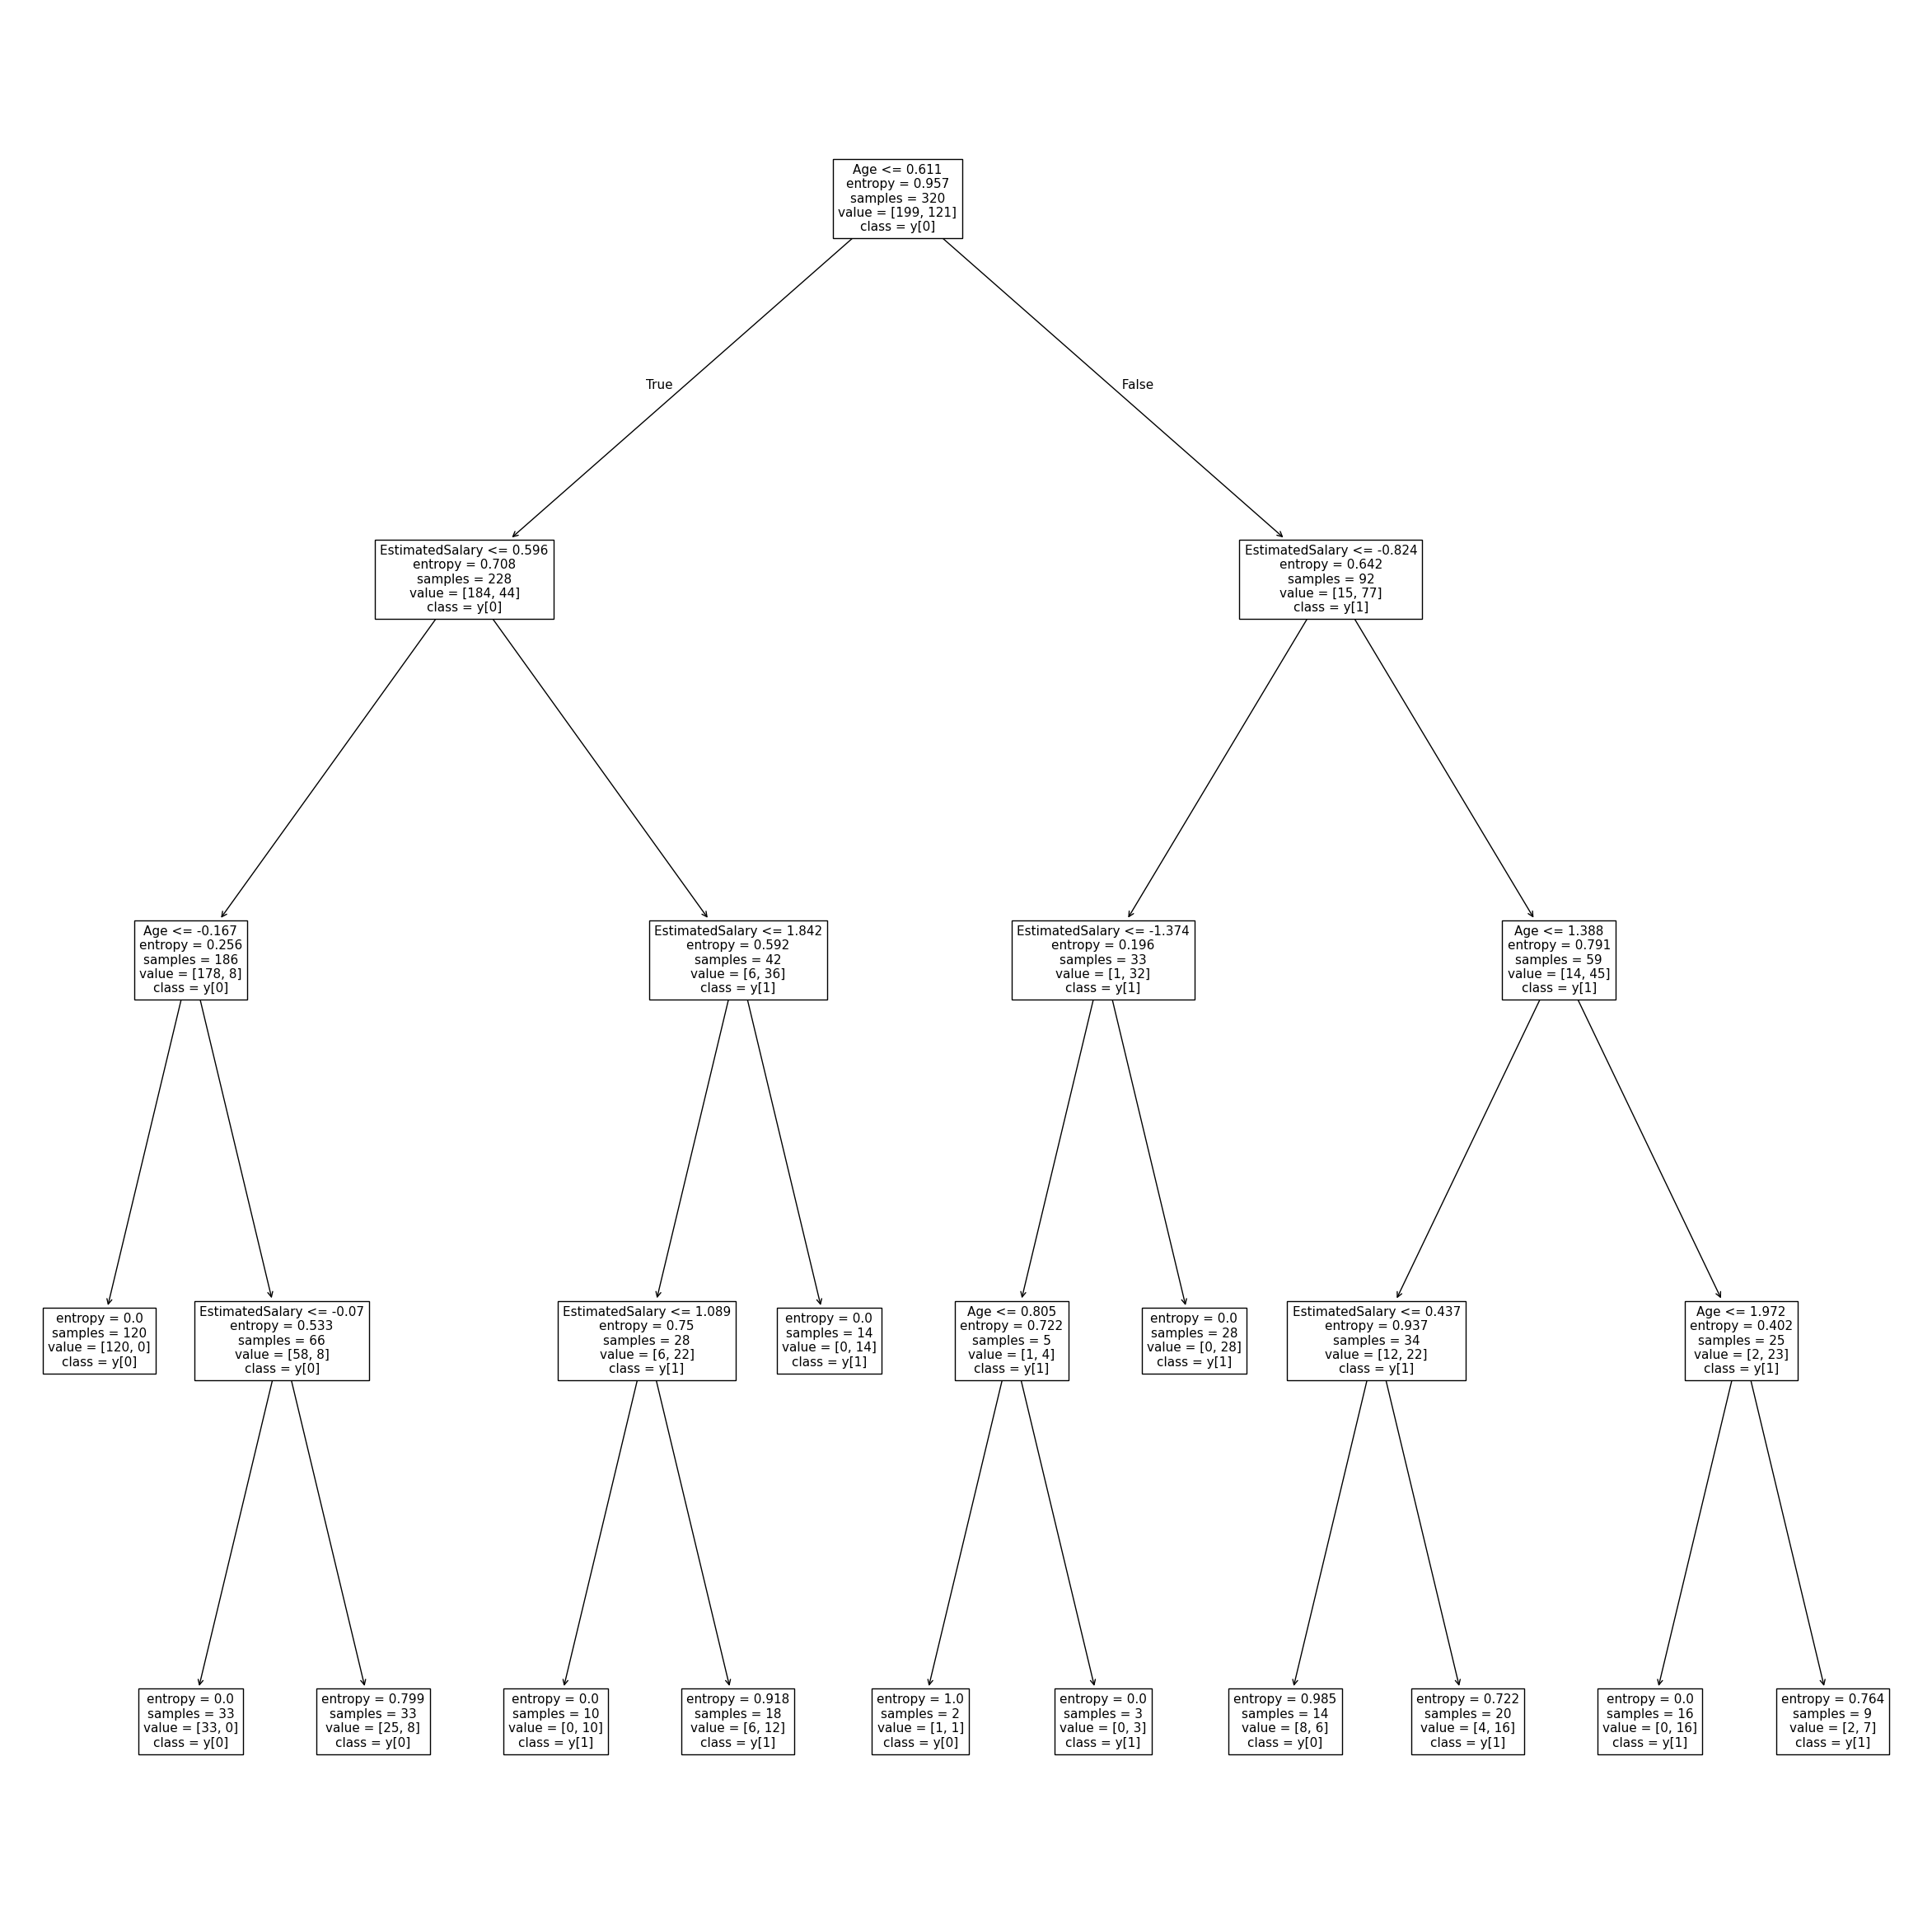

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree2 = DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=4)
tree2.fit(X_train_transform,y_train)
y_pred_test = tree2.predict(X_test_transform)
y_pred_train = tree2.predict(X_train_transform)

print(f"f1-score on training data is : {f1_score(y_train,y_pred_train)}")
print(f"f1-score on test data is : {f1_score(y_test,y_pred_test)}")
plt.figure(figsize=(30,30))
plot_tree(tree2,feature_names=X.columns,class_names=True)
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
tree = DecisionTreeClassifier(random_state=42)
param_grid = {"criterion":["gini", "entropy", "log_loss"],
             "max_depth":[2,4,5,6],
             "min_samples_split":[4,2,6]}
# Total model combinations = 3*4*3 = 36
# kfold = 5
# Total iterations = 36*5 = 180
grid = GridSearchCV(tree, cv=5,param_grid=param_grid,scoring='accuracy',verbose=1)
grid.fit(X_train_transform,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 5, 6],
                         'min_samples_split': [4, 2, 6]},
             scoring='accuracy', verbose=1)

In [27]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_split=4, random_state=42)

In [28]:
grid.best_score_

np.float64(0.9)

In [29]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 4}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeClassifier(random_state=42)
param_grid = {"criterion":["gini", "entropy", "log_loss"],
             "max_depth":[2,4,5,6],
             "min_samples_split":[4,2,6]}
random = RandomizedSearchCV(tree, cv=5,param_distributions=param_grid,scoring='accuracy',verbose=1)
random.fit(X_train_transform,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 4, 5, 6],
                                        'min_samples_split': [4, 2, 6]},
                   scoring='accuracy', verbose=1)

In [31]:
random.best_params_

{'min_samples_split': 4, 'max_depth': 2, 'criterion': 'entropy'}

In [32]:
random.best_score_

np.float64(0.9)

f1-score on training data is : 0.8862745098039215
f1-score on test data is : 0.9130434782608695


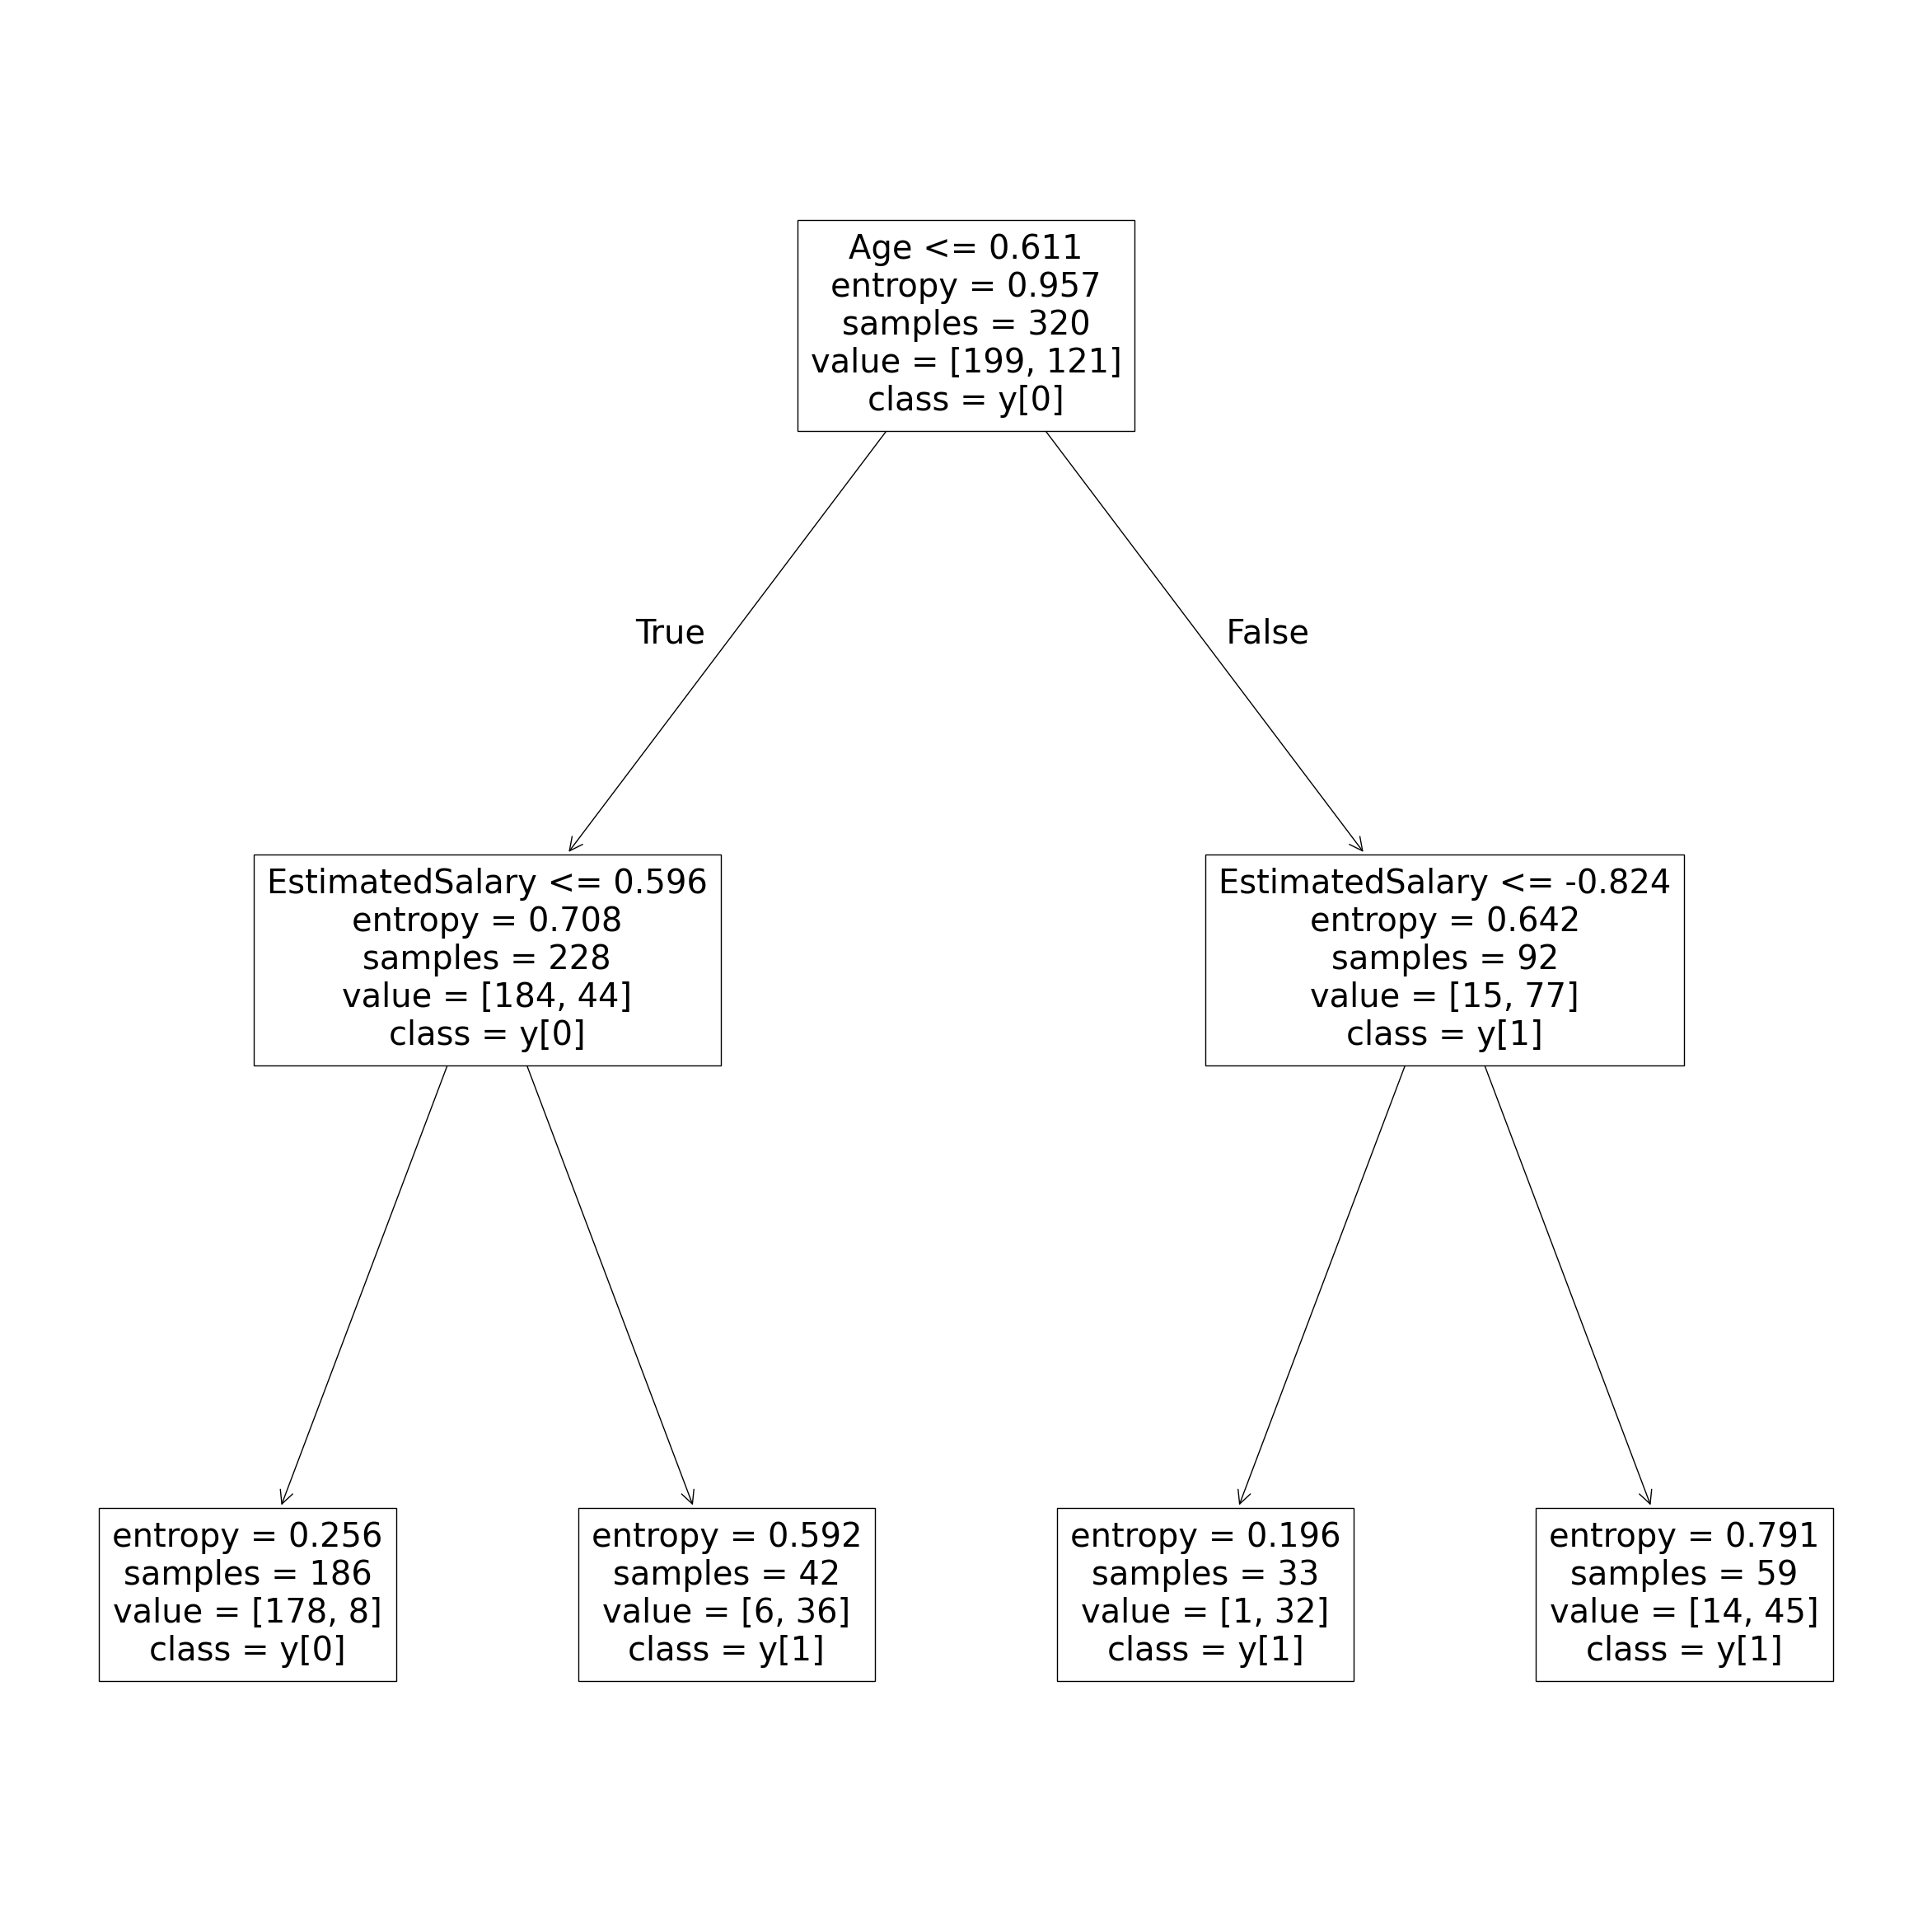

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree2 = DecisionTreeClassifier(random_state=0,criterion='entropy', max_depth=2, min_samples_split= 4)
tree2.fit(X_train_transform,y_train)
y_pred_test = tree2.predict(X_test_transform)
y_pred_train = tree2.predict(X_train_transform)

print(f"f1-score on training data is : {f1_score(y_train,y_pred_train)}")
print(f"f1-score on test data is : {f1_score(y_test,y_pred_test)}")
plt.figure(figsize=(30,30))
plot_tree(tree2,feature_names=X.columns,class_names=True)
plt.show()